In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the file

In [2]:
from scipy.io import wavfile
# sampling rate fs and data
fs, data = wavfile.read('fysikk.wav')

The car is heard approaching and departing twice, between 7-14 and 19-27 s

In [3]:
w1=data[7*fs:14*fs]
w2=data[19*fs:27*fs]

In [7]:
l=100 # number of sampling intervals

# number of samples in each interval
k1=int(np.floor(w1.shape[0]/100))
k2=int(np.floor(w2.shape[0]/100))

# number of data points in each interval
N1=w1.shape[0]
N2=w2.shape[0]

df1=fs/N1
df2=fs/N2
F1=np.arange(-fs/2,fs/2,df1)
F2=np.arange(-fs/2,fs/2,df2)
t1=np.linspace(7,14,100)
t2=np.linspace(19,27,100)

Calculating the Fourier transform of each sample

In [48]:
WW1=np.zeros((l,N1))
WW2=np.zeros((l,N2))


for i in range(l):
    WW1[i,:]=np.abs(np.fft.fftshift(np.fft.fft(w1[(i)*k1+np.arange(k1)],N1)))
    WW2[i,:]=np.abs(np.fft.fftshift(np.fft.fft(w2[(i)*k2+np.arange(k2)],N2)))
WW1 /=np.max(WW1)

Plotting

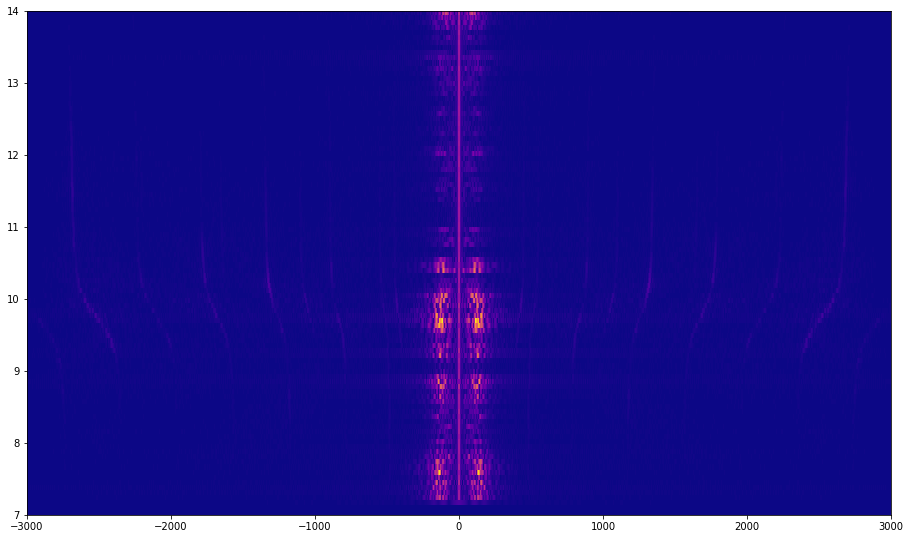

In [57]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_axes([0, 0, 1, 1])
ax.imshow(WW1,aspect=5000/10,cmap='plasma',extent=[F1[0], F1[-1],t1[0],t1[-1]],)